Phần 1: NBCF & MF theo n_factor RMSE (done)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'uuCF', 'k','dist_func', 'test_size', 'RMSE']

RMSEs = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rs = RMSEs.as_matrix()

dataset = rs[:, 0]
uuCF = rs[:, 1]
func_dist = rs[:, 3]

for n in ['100K', '1M']:
    for func in ['cosine_similarity', 'pearson']:
        fig, ax = plt.subplots()
        ids_ii = np.where((func_dist == func) & (dataset == n) & (uuCF == 0))[0].astype(np.int32)
        ids_uu = np.where((func_dist == func) & (dataset == n) & (uuCF == 1))[0].astype(np.int32)
        items_ii = rs[ids_ii, 5]
        items_uu = rs[ids_uu, 5]
        t_ii = rs[ids_ii, 2]
        t_uu = rs[ids_uu, 2]
        ax.plot(t_ii, items_ii, marker='o', label="iiCF")
        ax.plot(t_uu, items_uu, marker='D', label="uuCF")
        ax.set(xlabel='N (neighbors)', ylabel='RMSE',
               title= str('RMSE - ' + n + ' - ' + func))
        ax.legend()
        ax.grid()
#         fig.savefig(n + func + 'RMSE.png')
        plt.show()
for n in ['100K', '1M']:
    for u in [0, 1]:
        fig, ax = plt.subplots()
        ids_ii = np.where((func_dist == 'cosine_similarity') & (dataset == n) & (uuCF == u))[0].astype(np.int32)
        ids_uu = np.where((func_dist == 'pearson') & (dataset == n) & (uuCF == u))[0].astype(np.int32)
        items_ii = rs[ids_ii, 5]
        items_uu = rs[ids_uu, 5]
        t_ii = rs[ids_ii, 2]
        t_uu = rs[ids_uu, 2]
        ax.plot(t_ii, items_ii, marker='o', label="cosine")
        ax.plot(t_uu, items_uu, marker='D', label="pearson")
        if u:
            ax.set(xlabel='N (Neighbors)', ylabel='RMSE',
               title= str('RMSE - ' + n + ' - ' + 'uuCF'))
        else:
            ax.set(xlabel='N (Neighbors)', ylabel='RMSE',
               title= str('RMSE - ' + n + ' - ' + 'iiCF'))
        ax.legend()
        ax.grid()
#         fig.savefig(n + str(u) + 'RMSE.png')
        plt.show()

RMSE cho MF 100K

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'n_factors', 'n_epoches', 'n_printers', 'lamda','lr', 'RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(rmse.head(2))
rmse = rmse.as_matrix()

dataset = rmse[:, 0]
lamda = rmse[:, 5]
lr = rmse[:, 6]
n_factors = rmse[:, 2]
loops = rmse[:, 4]

"factors"
cases = ['o', 'D', '*', '>', '|', '+', 'h']
lamda_list = [0.01, 0.1, 0.5, 1]
k_list = [2, 4, 8, 16, 32, 64]
lr_list = [0.01, 0.1, 0.5, 0.75, 1, 2]


for i in lamda_list:
    for j in lr_list:
        c = 0
        fig, ax = plt.subplots()
        for k in k_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)

            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker=cases[c] , label=str('n_factors = ' + str(k)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 100K - n_factors - lamda = ' + str(i) + ' - learning_rate = ' + str(j)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_nF' + str(i) + '_' + str(j) + '.png')
        plt.show()
"lr"


for i in lamda_list:
    for k in k_list:
        fig, ax = plt.subplots()
        c = 0
        for j in lr_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)
            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker=cases[c] , label=str('learning_rate = ' + str(j)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 100K - learning_rate - lamda = ' + str(i) + ' - n_factors = ' + str(k)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_Learningrate' + str(i) + '_' + str(k) + '.png')
        plt.show()
        
for j in lr_list:
    for k in k_list:
        fig, ax = plt.subplots()
        c = 0
        for i in lamda_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)
            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker=cases[c] , label=str('lamda = ' + str(i)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 100K - lamda - learning_rate = ' + str(j) + ' - n_factors = ' + str(k)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_Lamda' + str(j) + '_' + str(k) + '.png')
        plt.show()

for k in k_list:
    c = 0
    for j in lr_list:
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lr == j) & (loops == 20))[0].astype(np.int32)
        print(ids)
        rmse_u = rmse[ids, 7]
        t = lamda_list
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='lamda', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - learning_rate = ' + str(j) + ' - n_factors = ' + str(k)))
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_20loops_lamda' + str(c) + '_' + str(k) + '.png')
        c+=1
        plt.show()

for k in k_list:
    c = 0
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lamda == i) & (loops == 20))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = lr_list
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='learning_rate', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - lamda = ' + str(i) + ' - n_factors = ' + str(k)))
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_20loops_lr' + str(c) + '_' + str(k) + '.png')
        c+=1
        plt.show()

c = 0
for j in lr_list:
# for k in [2, 5, 10]:
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((lr == j) & (lamda == i) & (loops == 20))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = k_list
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='n_factors', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - lamda = ' + str(i) + ' - learning_rate = ' + str(j)))
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_20loops_factors_'+ str(c) + '.png')
        plt.show()
        c+=1

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'n_factors', 'n_epoches', 'n_printers', 'lamda','lr', 'RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rmse = rmse.as_matrix()

dataset = rmse[:, 0]
lamda = rmse[:, 5]
lr = rmse[:, 6]
n_factors = rmse[:, 2]
k_list = [2, 4, 8, 16]
lamda_list = [0.01, 0.1, 0.5, 1]
lr_list = [0.1, 0.5, 0.75, 1, 2]
"factors"
cases = ['o', 'D', '*', '>', '|']

for k in k_list:
    c = 0
    for j in lr_list:
    
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lr == j) & (loops == 20))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = [0.01, 0.1, 0.5, 1]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='lamda', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - learning_rate = ' + str(j) + ' - n_factors = ' + str(k)))
        c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_3loops_lamda' + str(c) + '_' + str(k) + '.png')
        plt.show()

for k in k_list:
    c = 0
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lamda == i) & (loops == 20))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = [0.1, 0.5, 0.75, 1, 2]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='learning_rate', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - lamda = ' + str(i) + ' - n_factors = ' + str(k)))
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_3loops_lr' + str(c) + '_' + str(k) + '.png')
        c+=1
        plt.show()

c = 0
for j in lr_list:
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((lr == j) & (lamda == i) & (loops == 20))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = [2, 5, 10]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='n_factors', ylabel='RMSE',
            title= str('RMSE - 100K - 20 loops - lamda = ' + str(i) + ' - learning_rate = ' + str(j)))
        ax.legend()
        ax.grid()
#         fig.savefig('100K_MF_3loops_factors_'+ str(c) + '.png')
        plt.show()
        c+=1

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'n_factors', 'n_epoches', 'n_printers', 'lamda','lr', 'RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rmse = rmse.as_matrix()

dataset = rmse[:, 0]
lamda = rmse[:, 5]
lr = rmse[:, 6]
n_factors = rmse[:, 2]
cases = ['o', 'D', '*', '>', '|']
    
fig, ax = plt.subplots()
ids = np.where((n_factors == 2) & (lr == 0.1))[0].astype(np.int32)
rmse_u = rmse[ids, 7]
t = rmse[ids, 5]
ax.plot(t, rmse_u, marker=cases[0])
ax.set(xlabel='lamda', ylabel='RMSE',
    title= str('RMSE - 100K - 3 loops - learning_rate = 0.01 - n_factors = 3'))
ax.legend()
ax.grid()
# fig.savefig('100K_MF_3loops_lamda.png')
plt.show()

fig, ax = plt.subplots()
ids = np.where((n_factors == 2) & (lamda == 0.01))[0].astype(np.int32)
rmse_u = rmse[ids, 7]
t = rmse[ids, 6]
ax.plot(t, rmse_u, marker=cases[1])
ax.set(xlabel='learning_rate', ylabel='RMSE',
    title= str('RMSE - 100K - 3 loops - lamda = 0.01 - n_factors = 2'))
ax.legend()
ax.grid()
# fig.savefig('100K_MF_3loops_lr.png')
plt.show()

fig, ax = plt.subplots()
ids = np.where((lr == 0.1) & (lamda == 0.01))[0].astype(np.int32)
rmse_u = rmse[ids, 7]
t = rmse[ids, 2]
ax.plot(t, rmse_u, marker=cases[2])
ax.set(xlabel='n_factors', ylabel='RMSE',
    title= str('RMSE - 100K - 3 loops - lamda = 0.01 - learning_rate = 0.1'))
ax.legend()
ax.grid()
# fig.savefig('100K_MF_3loops_factors.png')
plt.show()

RMSE cho MF 1M

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'n_factors', 'n_epoches', 'n_printers', 'lamda', 'lr', 'RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rmse = rmse.as_matrix()

dataset = rmse[:, 0]
lamda = rmse[:, 5]
lr = rmse[:, 6]
n_factors = rmse[:, 2]
loops = rmse[:, 4]
"factors"
cases = ['o', 'D', '*', '>', '|', '+', 'h']
k_list = [2, 4, 8, 16]
lamda_list = [0.01, 0.1, 0.5, 1]
lr_list = [0.1, 0.5, 0.75, 1, 2]
c = 0

for i in lamda_list:
    for j in lr_list:
        fig, ax = plt.subplots()
        c = 0
        for k in k_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)
            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker = cases[c] , label=str('n_factors = ' + str(k)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 1M - n_factors - lamda = ' + str(i) + ' - learning_rate = ' + str(j)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_nF' + str(i) + '_' + str(j) + '.png')
        plt.show()
"lr"


for i in lamda_list:
    for k in k_list:
        fig, ax = plt.subplots()
        c = 0
        for j in lr_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)
            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker=cases[c] , label=str('learning_rate = ' + str(j)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 1M - learning_rate - lamda = ' + str(i) + ' - n_factors = ' + str(k)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_Learningrate' + str(i) + '_' + str(k) + '.png')
        plt.show()
        
for j in lr_list:
    for k in k_list:
        fig, ax = plt.subplots()
        c = 0
        for i in lamda_list:
            ids = np.where((n_factors == k) & (lamda == i) & (lr == j))[0].astype(np.int32)
            rmse_u = rmse[ids, 7]
            t = rmse[ids, 4]
            ax.plot(t, rmse_u, marker=cases[c] , label=str('lamda = ' + str(i)))
            ax.set(xlabel='loops', ylabel='RMSE',
                title= str('RMSE - 1M - lamda - learning_rate = ' + str(j) + ' - n_factors = ' + str(k)))
            c+=1
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_Lamda' + str(j) + '_' + str(k) + '.png')
        plt.show()

In [ ]:
for k in k_list:
    c = 0
    for j in lr_list:
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lr == j) & (loops == 10))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = rmse[ids, 5]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='lamda', ylabel='RMSE',
            title= str('RMSE - 1M - 10 loops - learning_rate = ' + str(j) + ' - n_factors = ' + str(k)))
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_10loops_lamda' + str(c) + '_' + str(k) + '.png')
        c+=1
        plt.show()

for k in k_list:
    c = 0
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((n_factors == k) & (lamda == i) & (loops == 10))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = rmse[ids, 6]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='learning_rate', ylabel='RMSE',
            title= str('RMSE - 1M - 10 loops - lamda = ' + str(i) + ' - n_factors = ' + str(k)))
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_10loops_lr' + str(c) + '_' + str(k) + '.png')
        c+=1
        plt.show()

c = 0
for j in lr_list:
    for i in lamda_list:
        fig, ax = plt.subplots()
        ids = np.where((lr == j) & (lamda == i) & (loops == 10))[0].astype(np.int32)
        rmse_u = rmse[ids, 7]
        t = rmse[ids, 2]
        ax.plot(t, rmse_u, marker=cases[0])
        ax.set(xlabel='n_factors', ylabel='RMSE',
            title= str('RMSE - 1M - 10 loops - lamda = ' + str(i) + ' - learning_rate = ' + str(j)))
        ax.legend()
        ax.grid()
#         fig.savefig('1M_MF_10loops_factors_'+ str(c) + '.png')
        plt.show()
        c+=1

RMSE cho Content-based

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['lamda', 'RMSE']

rmse = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
rmse = rmse.as_matrix()
t = 'RMSE - Content-based - 100K (top 200)'
f_name = '1M_01_Ctop200.png'

fig, ax = plt.subplots()
ax.plot(rmse[:,0], rmse[:, 1], marker='*')
ax.set(xlabel='lamda', ylabel='RMSE',
    title= t)
ax.legend()
ax.grid()
# fig.savefig(f_name)
plt.show()

Code Presion & Recall cho NBCF

  dataset  u   k     func         p         r
0      1M  1  10  pearson  0.000106  0.000177
1      1M  1  20  pearson  0.000636  0.002443


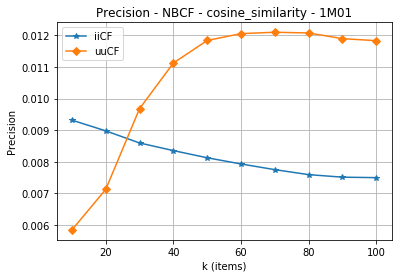

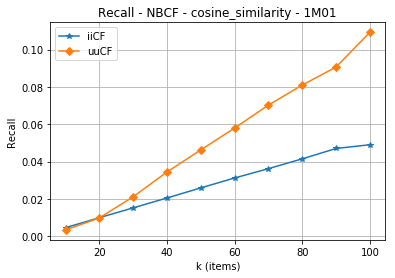

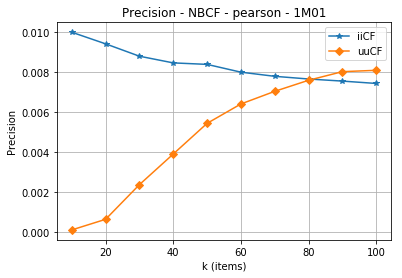

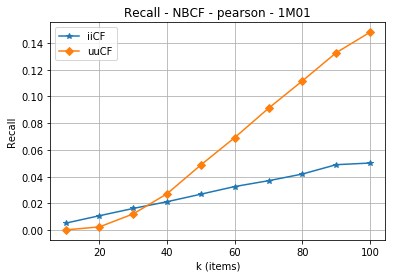

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'k', 'func', 'p', 'r']

pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr.head(2))
pr = pr.as_matrix()

dataset = pr[:, 0]
u = pr[:, 1]
f = pr[:, 3]

n = '1M01'
for func in ['cosine_similarity', 'pearson']:
    figP, axP = plt.subplots()
    figR, axR = plt.subplots()
    ids_ii = np.where((func == f) & (u == 0))[0].astype(np.int32)
    ids_uu = np.where((func == f) & (u == 1))[0].astype(np.int32)
    pi = pr[ids_ii, 4]
    pu = pr[ids_uu, 4]
    ri = pr[ids_ii, 5]
    ru = pr[ids_uu, 5]
    t_ii = pr[ids_ii, 2]
    t_uu = pr[ids_uu, 2]
    axP.plot(t_ii, pi, marker='*', label="iiCF")
    axP.plot(t_uu, pu, marker='D', label="uuCF")
    axP.set(xlabel='k (items)', ylabel='Precision',
           title= str('Precision - NBCF - ' + func + ' - ' + n))
    axP.legend()
    axP.grid()
    axR.plot(t_ii, ri, marker='*', label="iiCF")
    axR.plot(t_uu, ru, marker='D',label="uuCF")
    axR.set(xlabel='k (items)', ylabel='Recall',
           title= str('Recall - NBCF - ' + func + ' - ' + n))
    axR.legend()
    axR.grid()
    figP.savefig(n + func + 'precision_NBCF2.png')
    figR.savefig(n + func + 'recall_NBCF2.png')
    plt.show()

In [ ]:
dataset = pr[:, 0]
u = pr[:, 1]
f = pr[:, 3]

# for n in ['100K']:
for func in ['cosine_similarity', 'pearson']:
    figP, axP = plt.subplots()
    figR, axR = plt.subplots()
    ids_ii = np.where((func == f) & (u == 0))[0].astype(np.int32)
    ids_uu = np.where((func == f) & (u == 1))[0].astype(np.int32)
    pi = pr[ids_ii, 4]
    pu = pr[ids_uu, 4]
    ri = pr[ids_ii, 5]
    ru = pr[ids_uu, 5]
    t_ii = pr[ids_ii, 2]
    t_uu = pr[ids_uu, 2]
    axP.plot(t_ii, pi, label="precision")
    axP.plot(t_ii, ri, label="recall")
    axP.set(xlabel='k (items)',
           title= str('iiCF - ' + func + ' - ' + n))
    axP.legend()
    axP.grid()
    axR.plot(t_uu, pu, label="precision")
    axR.plot(t_uu, ru, label="recall")
    axR.set(xlabel='k (items)',
           title= str('uuCF - ' + func + ' - ' + n))
    axR.legend()
    axR.grid()
#     figP.savefig(n + 'cosine_precision.png')
#     figR.savefig(n + 'cosine_recall.png')
    plt.show()

Ve PR cho MF

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'u', 'top', 'n_factors', 'n_epoches', 'test_size', 'p', 'r']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr.head(2))
pr = pr.as_matrix()

n = '1M03'
fig, ax = plt.subplots()
ax.plot(pr[:, 2], pr[:, 7], marker='h')
ax.set(xlabel='k (items)', ylabel="Recall",
       title= str('Recall - MF- ' + n ))
ax.legend()
ax.grid()
fig.savefig(n + 'RecallMF2.png')
plt.show()

fig, ax = plt.subplots()
ax.plot(pr[:, 2], pr[:, 6], marker='*')
ax.set(xlabel='k (items)', ylabel="Precison",
       title= str('Precision - MF - ' + n ))
ax.legend()
ax.grid()
fig.savefig(n + 'PrecisionMF2.png')
plt.show()

Ve PR cho Content-based

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['dataset', 'top', 'lamda', 'p', 'r']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr.head(2))
pr = pr.as_matrix()

n = '100K'
fig, ax = plt.subplots()
ax.plot(pr[:, 1], pr[:, 4], marker='h')
ax.set(xlabel='k (items)', ylabel="Recall",
       title= str('Recall - Content-based - ' + n))
ax.legend()
ax.grid()
fig.savefig(n + 'RecallC2.png')
plt.show()

fig, ax = plt.subplots()
ax.plot(pr[:, 1], pr[:, 3], marker='*')
ax.set(xlabel='k (items)', ylabel="Precison",
       title= str('Precision - Content-based - ' + n ))
ax.legend()
ax.grid()
fig.savefig(n + 'PrecisionC2.png')
plt.show()

Vẽ biểu đồ cột so sánh các mô hình

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['algorithm', 'dataset', 'test_size',  'RMSE']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr)
pr = pr.as_matrix()
ids_1 = range(0, 8, 2)
ids_2 = range(1, 8, 2)
print(pr[ids_1, 3], pr[ids_2, 3])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

K_means = (1.0245, 0.9822, 0.9934, 0.9624)
M_means = (1.0373, 0.9011, 0.9277, 0.9086)

ind = np.arange(len(K_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, K_means, width,
                label='100K')
rects2 = ax.bar(ind + width/2, M_means, width,
                label='1M')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('So sánh các phương pháp với bộ tham số tốt nhất')
ax.set_xticks(ind)
ax.set_xticklabels(('Content-based', 'iiCF', 'uuCF', 'MF'))
ax.legend(bbox_to_anchor=(1.2, 1))


def autolabel(rects, xpos='center'):

    ha = {'center': 'center', 'right': 'left', 'left': 'right', 'top' : 'top'}
    offset = {'center': 0, 'right': -5, 'left': 3, 'top': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 0),  # use 3 points offset
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
fig.savefig('compare.png', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

r_cols = ['algorithm', 'dataset',  'p']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr)
pr = pr.as_matrix()
print(pr[[0, 2, 4, 6], 2])
print(pr[[1, 3, 5, 7], 2])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

K_means = (0.006681, 0.007629, 0.011362, 0.029480)

ind = np.arange(len(K_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, K_means, width,
                label='100K')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision')
ax.set_title('So sánh Precision các phương pháp với bộ tham số tốt nhất của tập 100K')
ax.set_xticks(ind)
ax.set_xticklabels(('CB(K =70)', 'iiCF(K = 120)', 'uuCF(K =160)', 'MF(K =10)'))
ax.set_xmargin(m = 0.99)


def autolabel(rects, xpos='center'):

    ha = {'center': 'center', 'right': 'left', 'left': 'right', 'top' : 'top'}
    offset = {'center': 0, 'right': 0, 'left': 0, 'top': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*0, 0),  # use 3 points offset
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")

fig.tight_layout()
fig.savefig('compareP.png', bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


K_means = (0.00668, 0.00763, 0.011362, 0.02948)
M_means = (0.00435, 0.01276, 0.01234, 0.013046)

ind = np.arange(len(K_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, K_means, width,
                label='100K')
rects2 = ax.bar(ind + width/2, M_means, width,
                label='1M')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision')
ax.set_title('So sánh Precision các phương pháp với bộ tham số tốt nhất')
ax.set_xticks(ind)
ax.set_xticklabels(('Content-based', 'iiCF', 'uuCF', 'MF'))
ax.legend(bbox_to_anchor=(1.2, 1))


def autolabel(rects, xpos='center'):

    ha = {'center': 'center', 'right': 'left', 'left': 'right', 'top' : 'top'}
    offset = {'center': 0, 'right': -6, 'left': 5, 'top': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 0),  # use 3 points offset
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
fig.savefig('compareP2.png', bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r_cols = ['dataset', 'top', 'p', 'r']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr.head(2))
pr = pr.as_matrix()

x = range(10, 110, 10)
y1 = pr[range(0, 10, 1), 2]
y2 = pr[range(10, 20, 1), 2]
y3 = pr[range(20, 30, 1), 2]
y4 = pr[range(30, 40, 1), 2]

# y = np.vstack([pr[y1, 2], pr[y2, 2], pr[y3, 2], pr[y4, 2]])

# labels = ["Content-based", "MF", "uuCF", "iiCF"]

# fig, ax = plt.subplots()
# ax.stackplot(x, pr[y1, 2], pr[y2, 2], pr[y3, 2], pr[y4, 2], labels=labels)
# ax.legend(loc='upper left')
# plt.show()

  dataset  top         p         r
0      1M   10  0.002384  0.002611
1      1M   20  0.002318  0.004768


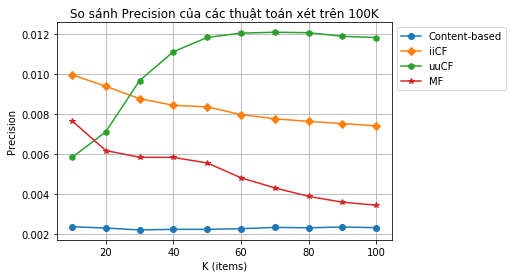

In [13]:
import numpy as np
import matplotlib.pyplot as plt

r_cols = ['dataset', 'top', 'p', 'r']
pr = pd.read_csv('graph.dat', sep='::', names=r_cols, encoding='latin-1', engine='python')
print(pr.head(2))
pr = pr.as_matrix()

x = range(10, 110, 10)
y1 = pr[range(0, 10, 1), 2]
y2 = pr[range(10, 20, 1), 2]
y3 = pr[range(20, 30, 1), 2]
y4 = pr[range(30, 40, 1), 2]

fig, ax = plt.subplots()

ax.plot(x, y1, marker='o', label="Content-based")
ax.plot(x, y2, marker='D', label="iiCF")
ax.plot(x, y3, marker='h', label="uuCF")
ax.plot(x, y4, marker='*', label="MF")
ax.set(xlabel='K (items)', ylabel='Precision',
       title= "So sánh Precision của các thuật toán xét trên 100K")
ax.legend()
ax.grid()
ax.legend(bbox_to_anchor=(1, 1))
fig.savefig('1M01_CompareP_top100.png', bbox_inches='tight')
plt.show()

ví dụ điển hình

In [ ]:
# # evenly sampled time at 200ms intervals
# t = np.arange(0., 5., 0.2)

# # red dashes, blue squares and green triangles
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# plt.show()